# 04-07

## Challenge 01 - Flag Scanner 🇧🇯🇨🇳🇧🇧🇪🇨🇨🇺🇬🇦🇫🇮

---

![](https://www.probuilder.com/sites/probuilder/files/styles/con/public/oleh-aleinyk-711501-unsplash.jpg?itok=2wp-5ulq)

## Instructions

In this exercise, we will train a **Decision Tree** model that predicts the continent of a country based on its flag.

The data comes from this open dataset: http://archive.ics.uci.edu/ml/datasets/Flags

You will make sure to create **reproducible results** by stating a `random_state` anytime it is required.

Follow the steps below:

Q1. Load the dataset in a DataFrame variable named `flags`. Make sure to include row 0 as header as it contains the column names.

  What is the shape of the data, what features (and how many) does the dataset contain?

In [261]:
### TODO: load the dataset
import pandas as pd
import numpy as np

flags = pd.read_csv('flags.csv')

Q2. Create a DataFrame variable `y` corresponding to our target variable column.

In [262]:
flags.shape

(194, 30)

In [263]:
flags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        194 non-null    object
 1   Landmass    194 non-null    int64 
 2   Zone        194 non-null    int64 
 3   Area        194 non-null    int64 
 4   Population  194 non-null    int64 
 5   Language    194 non-null    int64 
 6   Religion    194 non-null    int64 
 7   Bars        194 non-null    int64 
 8   Stripes     194 non-null    int64 
 9   Colors      194 non-null    int64 
 10  Red         194 non-null    int64 
 11  Green       194 non-null    int64 
 12  Blue        194 non-null    int64 
 13  Gold        194 non-null    int64 
 14  White       194 non-null    int64 
 15  Black       194 non-null    int64 
 16  Orange      194 non-null    int64 
 17  Mainhue     194 non-null    object
 18  Circles     194 non-null    int64 
 19  Crosses     194 non-null    int64 
 20  Saltires  

In [264]:
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [265]:
flags.Landmass.unique()

array([5, 3, 4, 6, 1, 2])

In [266]:
flags.Saltires

0      0
1      0
2      0
3      0
4      0
      ..
189    0
190    0
191    0
192    0
193    0
Name: Saltires, Length: 194, dtype: int64

In [267]:
### TODO: create y
y = flags.Landmass

Q3. Create a DataFrame variable `X` containing only the following features columns:
  - "Red"
  - "Green"
  - "Blue"
  - "Gold"
  - "White"
  - "Black"
  - "Orange"

In [268]:
### TODO: create X
features = ['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']
X = flags[features]

Q4. Split your data into a training set of 70% and a testing set with the remaining lines.

In [269]:
### TODO: split your data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42, stratify=y)

Q5. Fit a **`DecisionTree`** classifier on your data and **evaluate your model**. What would be the score of *random guessing* the continent? Compare with your model performance.

In [270]:
### TODO: fit your model and evaluate it
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
score = dtc.score(X_test, y_test)
print(score)

0.4067796610169492


Random guessing would have a score of 0.5. The models performs worse than random guessing.

In [271]:
dtc.score(X_train, y_train)

0.6

It seems it underfits.

Q6. We have a first performance benchmark. Using `GridSearchCV`, train your tree with `max_depth` value varying from 1 to 20 and observe the impact on your accuracy.

  Plot these results in a chart with x-axis for depth of the tree and the y-axis corresponding the tree's accuracy.


In [272]:
### TODO: compute a grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : np.arange(1,21)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, verbose=1)

In [273]:
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             verbose=1)

In [274]:
### TODO: plot the results of the grid search
params = param_grid['max_depth']

In [275]:
params

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [276]:
scores = dt_grid.cv_results_['mean_test_score']

In [277]:
scores

array([0.33333333, 0.31851852, 0.34074074, 0.37037037, 0.41481481,
       0.4       , 0.39259259, 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ])

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Test score')

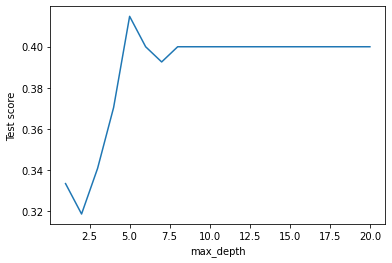

In [279]:
plt.figure()

sns.lineplot(x=params, y=scores)

plt.xlabel('max_depth')
plt.ylabel('Test score')

Q7. 
> 🔦 **Hint**: Our graph does not really look like what we expected. The depth of the tree does not have a clear impact on the tree score. This might be a good indication that we are not using enough features.

  Add all the features associated to the the shapes of the flag, and redo the analysis. What does your graph look like after making this change?

In [280]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [281]:
### TODO: add features and redo the analysis
full_features = ['Bars','Stripes','Circles', 'Crosses', 'Saltires', 'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']

X_full = flags[full_features]

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, train_size=.7, random_state=42, stratify=y)

In [283]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
score = dtc.score(X_test, y_test)
print(score)

0.3389830508474576


In [284]:
dtc.score(X_train, y_train)

0.9629629629629629

Here the model is likely overfitting.

In [285]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, verbose=1)
dt_grid.fit(X_train, y_train)
scores = dt_grid.cv_results_['mean_test_score']

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Text(0, 0.5, 'Test score')

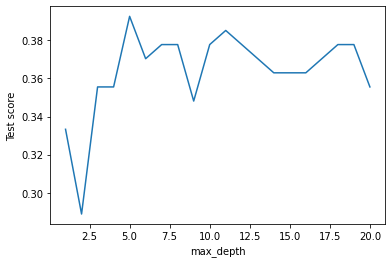

In [286]:
plt.figure()

sns.lineplot(x=params, y=scores)

plt.xlabel('max_depth')
plt.ylabel('Test score')

Q8. Explore on your own and try improving the score of your decision tree. Here are some suggestions on improvements:
  - Tune other hyper-parameters. Think about whether you are overfitting or underfitting the data based on the hyper-parameter selected and the value chosen
  - Select a subset of features that work better on this data  


In [287]:
sort_features = np.argsort(-dtc.feature_importances_)

In [288]:
sort_features

array([ 1,  6, 15, 13,  9, 11,  2,  5,  0, 14,  3, 10,  8,  7, 16, 12,  4])

In [289]:
dtc.feature_importances_

array([0.04938191, 0.17143765, 0.05872851, 0.04331553, 0.00319602,
       0.05023463, 0.10234403, 0.03117454, 0.0324929 , 0.06972188,
       0.04026989, 0.06740818, 0.024137  , 0.08563022, 0.04582868,
       0.09998251, 0.02471591])

In [290]:
X_full.columns[sort_features]

Index(['Stripes', 'Sunstars', 'Black', 'Gold', 'Icon', 'Green', 'Circles',
       'Quarters', 'Bars', 'White', 'Crosses', 'Red', 'Triangle', 'Crescent',
       'Orange', 'Blue', 'Saltires'],
      dtype='object')

In [330]:
selected_features = X_full.columns[sort_features][:12]
X_selected = flags[selected_features]

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, train_size=.7, random_state=42, stratify=y)

In [332]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
score = dtc.score(X_test, y_test)
print(score)

0.3898305084745763


In [333]:
dtc.score(X_train, y_train)

0.9259259259259259

In [334]:
param_grid = {'max_depth' : np.arange(1,21)}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, verbose=1)
dt_grid.fit(X_train, y_train)
scores = dt_grid.cv_results_['mean_test_score']

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [335]:
train_scores = []

for depth in params:
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc.fit(X_train, y_train)
    train_scores.append(dtc.score(X_train, y_train))

Text(0, 0.5, 'Score')

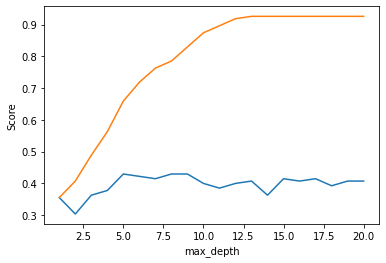

In [336]:
plt.figure()

sns.lineplot(x=params, y=scores)
sns.lineplot(x=params, y=train_scores)


plt.xlabel('max_depth')
plt.ylabel('Score')

In [343]:
param_grid = {'max_depth' : np.arange(3,10), 'min_samples_split': np.arange(2,10), 'min_samples_leaf': np.arange(2,10)}

In [344]:
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, verbose=1)
dt_grid.fit(X_train, y_train)
scores = dt_grid.cv_results_['mean_test_score']

Fitting 5 folds for each of 5508 candidates, totalling 27540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 27540 out of 27540 | elapsed:  1.8min finished


In [345]:
pd.DataFrame(dt_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003471,0.000679,0.001889,0.000222,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.370370,0.333333,0.407407,0.370370,0.407407,0.377778,0.027716,1311
1,0.003320,0.000422,0.001812,0.000114,3,2,3,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.370370,0.333333,0.407407,0.370370,0.407407,0.377778,0.027716,1311
2,0.002650,0.000293,0.001567,0.000128,3,2,4,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.370370,0.333333,0.407407,0.370370,0.407407,0.377778,0.027716,1311
3,0.002177,0.000038,0.001354,0.000019,3,2,5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.370370,0.333333,0.407407,0.370370,0.407407,0.377778,0.027716,1311
4,0.002123,0.000011,0.001322,0.000017,3,2,6,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.370370,0.333333,0.407407,0.370370,0.407407,0.377778,0.027716,1311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,0.002289,0.000006,0.001426,0.000001,19,19,15,"{'max_depth': 19, 'min_samples_leaf': 19, 'min...",0.296296,0.370370,0.444444,0.296296,0.370370,0.355556,0.055432,2094
5504,0.002279,0.000004,0.001423,0.000004,19,19,16,"{'max_depth': 19, 'min_samples_leaf': 19, 'min...",0.296296,0.370370,0.444444,0.296296,0.370370,0.355556,0.055432,2094
5505,0.002291,0.000006,0.001428,0.000005,19,19,17,"{'max_depth': 19, 'min_samples_leaf': 19, 'min...",0.296296,0.370370,0.444444,0.296296,0.370370,0.355556,0.055432,2094
5506,0.002280,0.000006,0.001422,0.000006,19,19,18,"{'max_depth': 19, 'min_samples_leaf': 19, 'min...",0.296296,0.370370,0.444444,0.296296,0.370370,0.355556,0.055432,2094


In [346]:
dtc_best = dt_grid.best_estimator_

In [347]:
dt_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 7}

In [348]:
test_score = dtc_best.score(X_test, y_test)
train_score = dtc_best.score(X_train, y_train)
print(f'Train score: {train_score}\nTest score: {test_score}')

Train score: 0.674074074074074
Test score: 0.5084745762711864


We again are underfitting the data. After multiple attempts, it seems difficult here to have a good model. The best score we got is barely better tha random guessing.